In [21]:
from scipy.stats import mode
from sklearn.ensemble import RandomForestClassifier
from statsmodels.discrete.discrete_model import Logit
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pandas.tools.plotting import scatter_matrix
%matplotlib inline
# Set font for plotting
sns.set(font_scale=1.5)

In [22]:
train = pd.read_csv('data/titanic_train.csv')
test = pd.read_csv('data/titanic_test.csv')

In [23]:
train.shape

(891, 12)

In [102]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Let's look at the type of our features

In [9]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### => 7 numeric features, 5 non numeric features

### Let's have a look at our target variable and its distribution

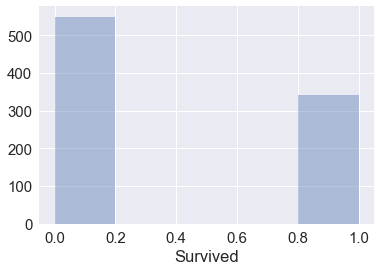

In [17]:
sns.distplot(train['Survived'], kde=False);

### Our target variable is imbalanced

### Do we have nan/null/missing values in our data

In [28]:
train.isnull().sum()
# t = train.isnull().sum()
# t[t > 0]

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [90]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [91]:
test.shape

(418, 11)

### We need to keep that in mind and deal with it later on.

## Univariate Feature Analysis (categorical feature/ numerical feature)   

## 1. Numerical Features

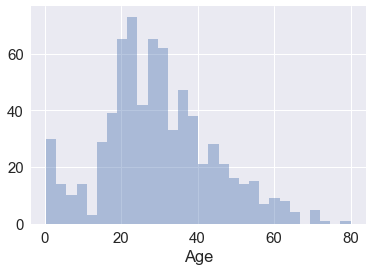

In [104]:
f, ax = plt.subplots(figsize=(6, 4))
sns.distplot(train.Age.dropna(), kde=False, bins=30);

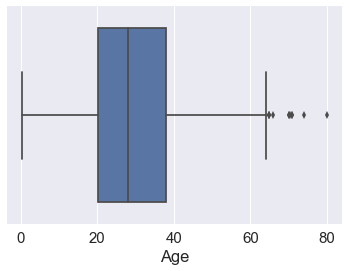

In [105]:
f, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(x="Age", data=train);

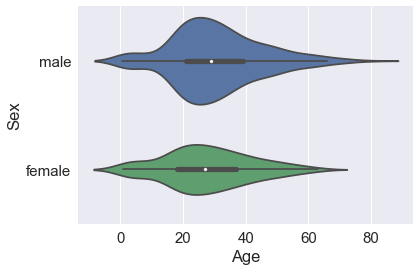

In [103]:
sns.violinplot(x="Age", y="Sex", data=train, scale='count', split=True)

## 2. Categorical Features

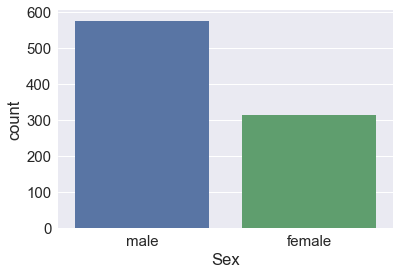

In [106]:
f, ax = plt.subplots(figsize=(6, 4))
sns.countplot(train.Sex);

## Bivariate Feature Analysis (cat/num , cat/cat , num/num)

## 1. Categorical + Categorical feature

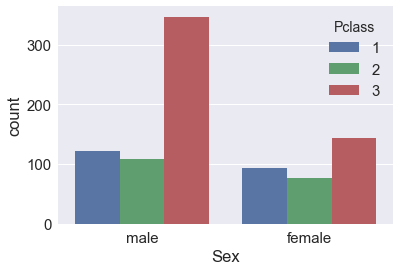

In [107]:
f, ax = plt.subplots(figsize=(6, 4))
sns.countplot(x='Sex', hue="Pclass", data=train);

If you want to analyse the interaction between two or more features you can use factorplot or even more powerful FacetGrid.

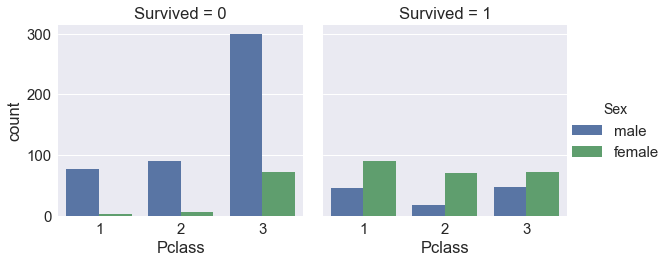

In [52]:
sns.factorplot(x="Pclass", hue="Sex", col="Survived", data=train, kind="count")

In [66]:
#g = sns.FacetGrid(data=train, col='SibSp')
#g.map(sns.countplot, data=train, x='Pclass', hue='Sex', order=)

## 2. Numeric + Numeric

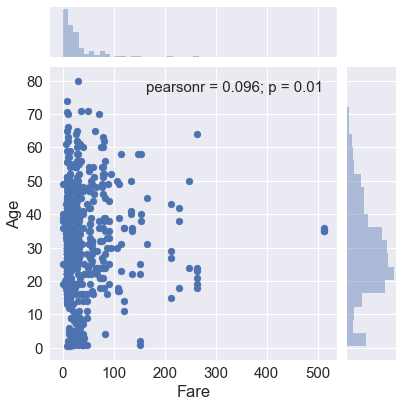

In [97]:
sns.jointplot(x="Fare", y="Age", data=train); # Jointplot aka scatterplot

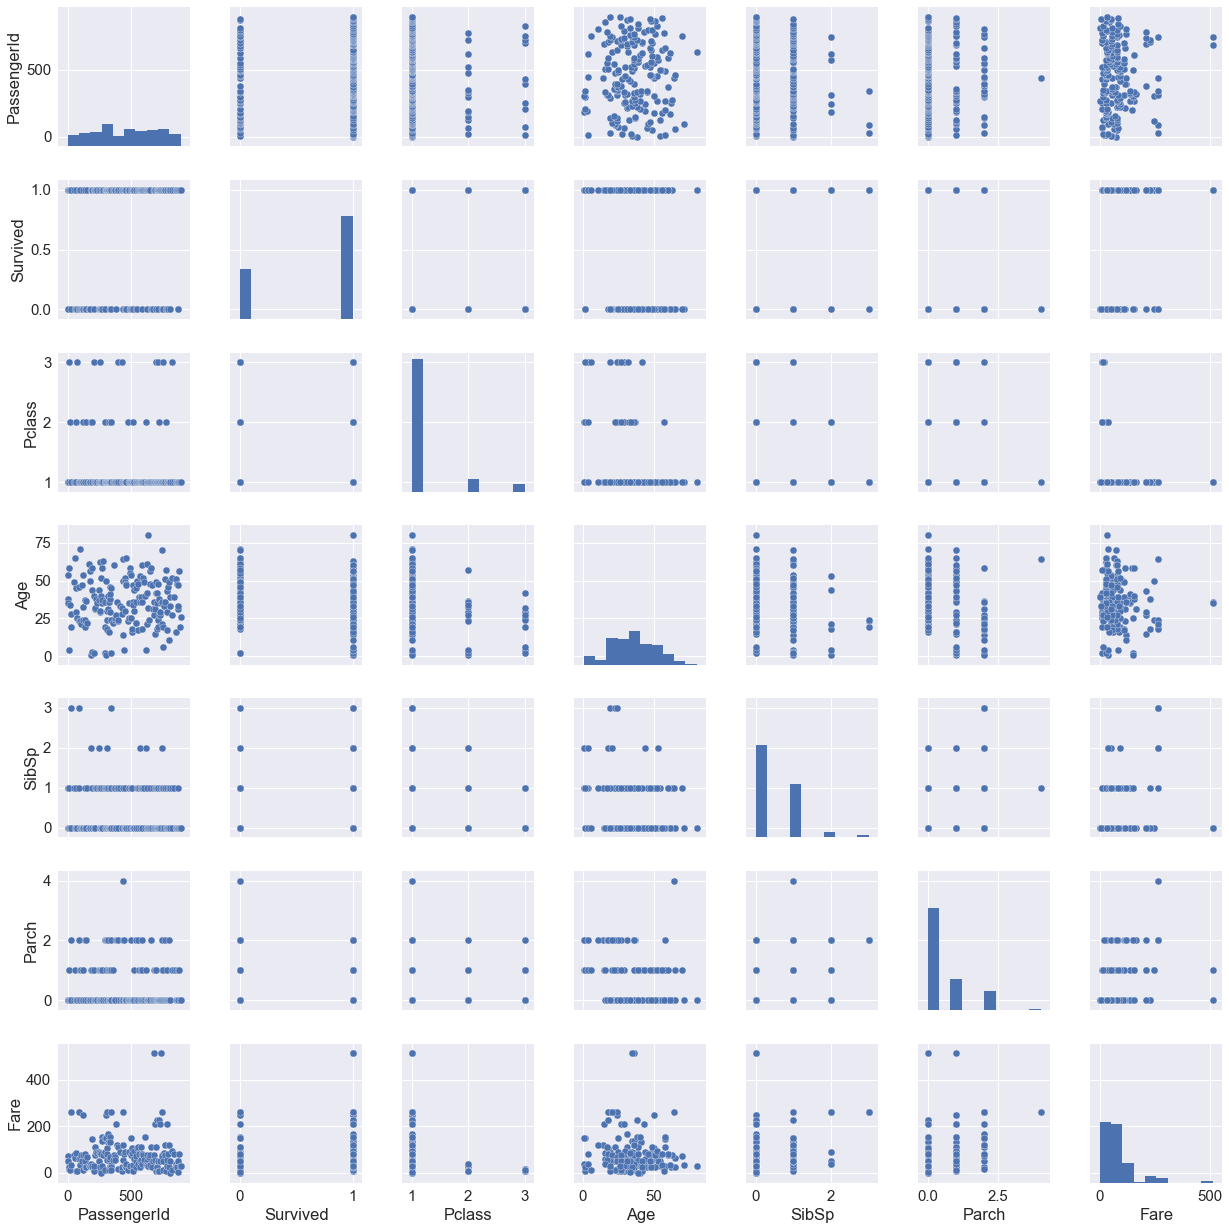

In [86]:
g = sns.pairplot(data=train.dropna())

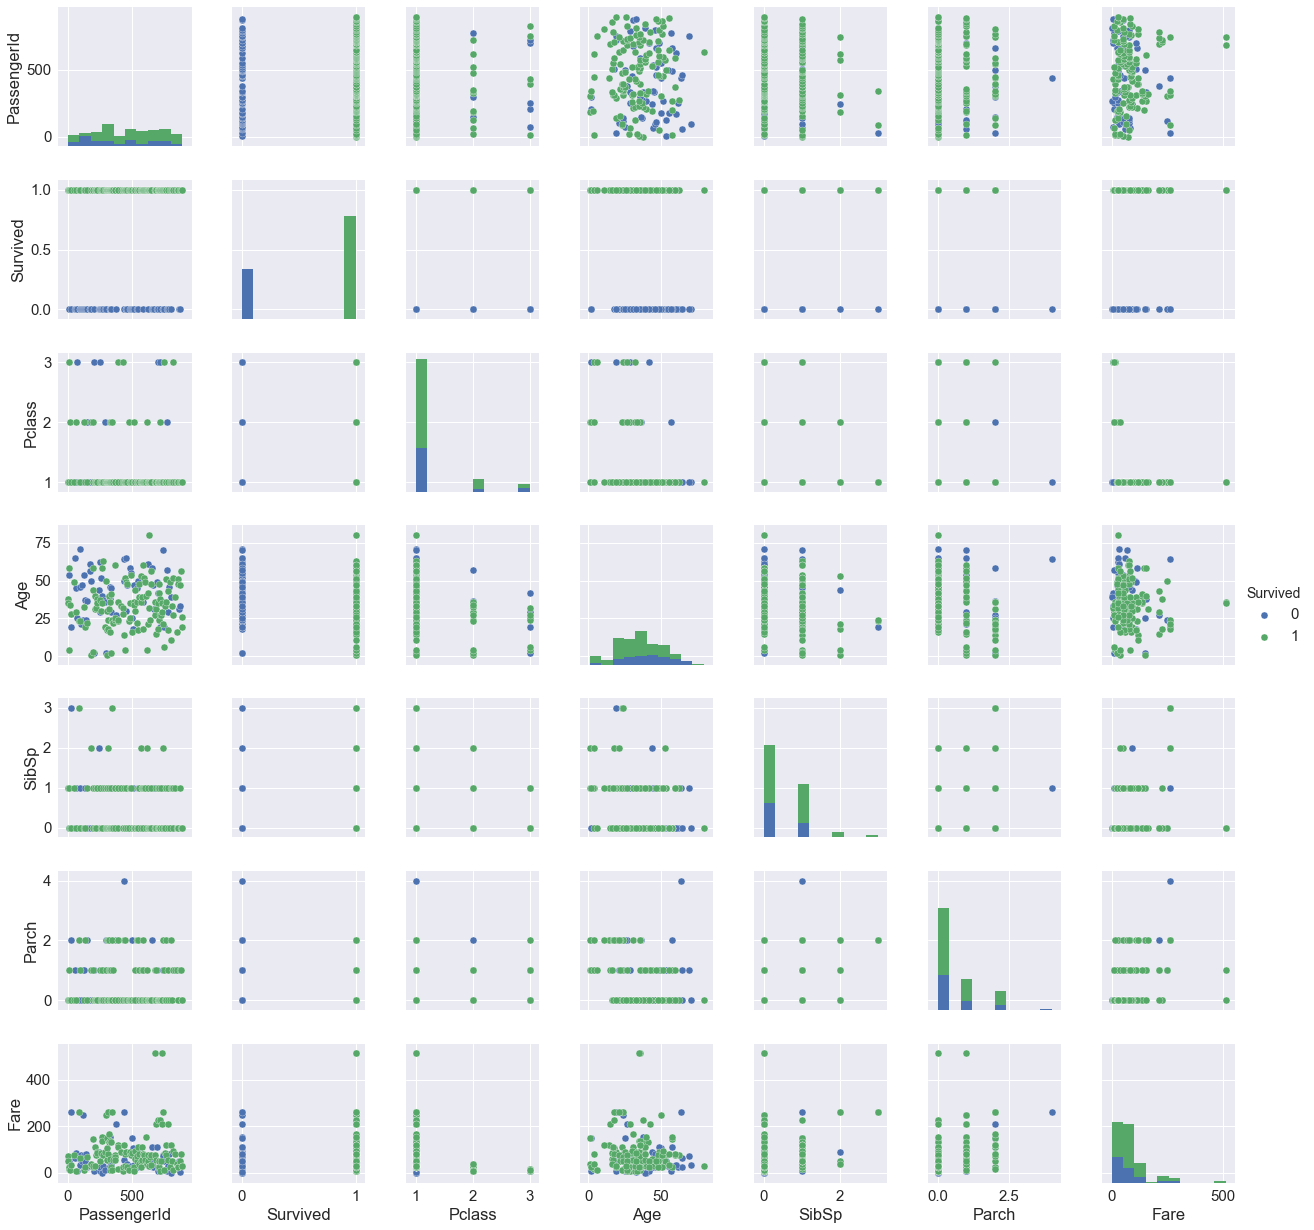

In [87]:
g = sns.pairplot(data=train.dropna(), hue='Survived') # 7x7 is pretty useless

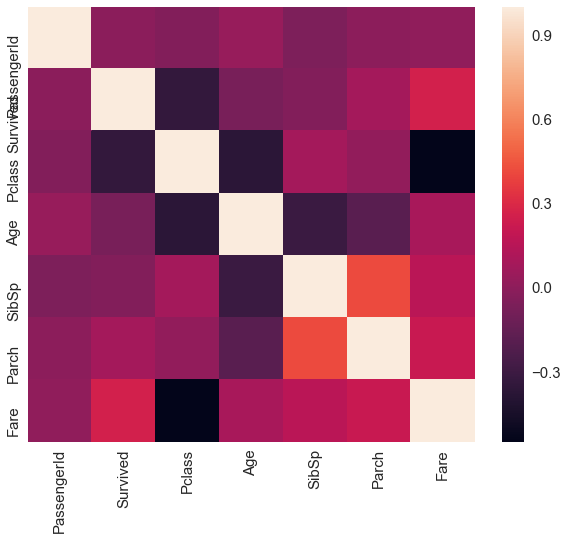

In [108]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(train.corr());

In [52]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [56]:
train.corr().iloc[1,:].sort_values() # 1: Survived

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

Zero correlation doesn't mean that there is no information in the feature which we can use, but it's at least an indicator. https://stats.stackexchange.com/questions/29489/how-do-i-study-the-correlation-between-a-continuous-variable-and-a-categorical

https://stats.stackexchange.com/questions/81659/mutual-information-versus-correlation


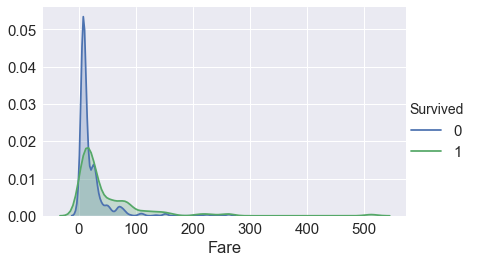

In [109]:
fg = sns.FacetGrid(data=train, hue="Survived", aspect=1.5, size=4)
#fg.map(sns.kdeplot, "Age", shade=True)
fg.map(sns.kdeplot, "Fare", shade=True)
#fg.set(ylabel='Percent of Passengers')
fg.add_legend()
#plt.title('Age Distribution by Survival');

## 3. Categorical + Numeric

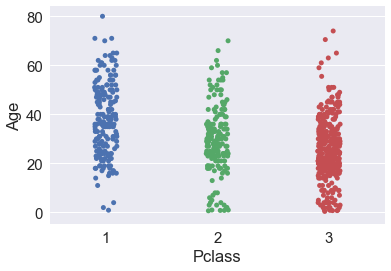

In [112]:
f, ax = plt.subplots(figsize=(6, 4))
sns.stripplot(x="Pclass", y='Age', data=train, jitter=True);

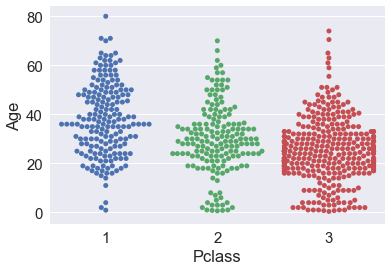

In [92]:
sns.swarmplot(x="Pclass", y='Age', data=train);

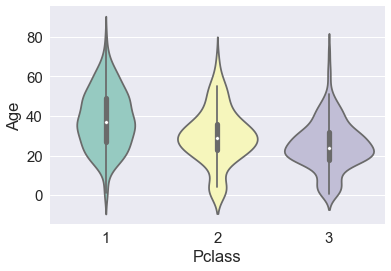

In [72]:
sns.violinplot(x="Pclass", y="Age", data=train, split=True, size=6, palette="Set3");

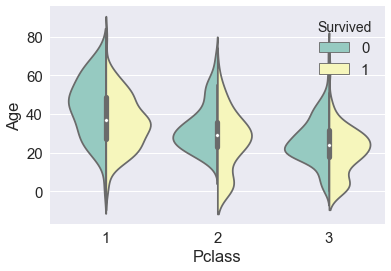

In [101]:
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train, split=True, size=6, palette="Set3");

## Plots für categorical features
ax = sns.factorplot(x="Sex", hue="Survived", data=train, kind="count", size=6)

## Plots for numerical features
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(train.corr());  

sns.distplot(train['Survived'], kde=False);  

fg = sns.FacetGrid(data=train, hue="Survived", aspect=1.5, size=6)  
#fg.map(sns.kdeplot, "Age", shade=True)
fg.map(sns.kdeplot, "Fare", shade=True)
#fg.set(ylabel='Percent of Passengers')
fg.add_legend()
#plt.title('Age Distribution by Survival');

sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train, split=True, size=6, palette="Set3");